Importing Dependencies....

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
#!pip install xgboost
from xgboost import XGBRegressor

Data Collection $$ pre-processing.........

In [2]:
house_price_data=pd.read_csv("BostonHousing.csv")

In [3]:
house_price_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(house_price_data)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [5]:
house_price_data['price']=house_price_data.medv

In [6]:
house_price_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2


In [7]:
house_price_data=house_price_data.drop(columns='medv',axis=1)

In [8]:
house_price_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
house_price_data.shape

(506, 14)

In [10]:
house_price_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [11]:
house_price_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Correlation between various features in the dataset......

In [12]:
correlation=house_price_data.corr()

<Axes: >

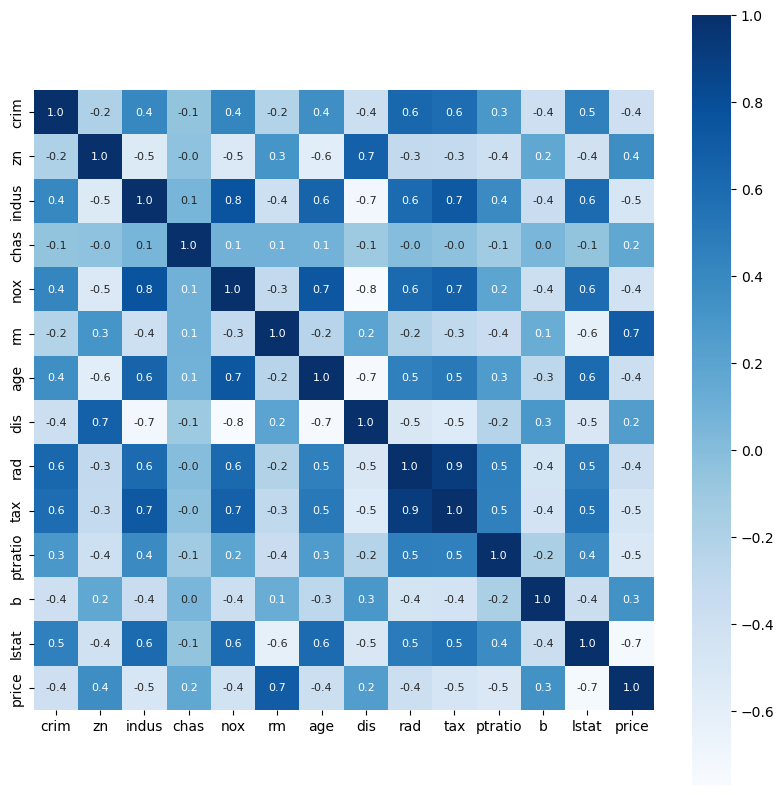

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Splitting data && Target

In [14]:
x=house_price_data.drop(columns='price',axis=1)
y=house_price_data['price']

In [15]:
print(x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [16]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


Splitting data into Training & Testing data....

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
print(x.shape,x_test.shape,x_train.shape)

(506, 13) (102, 13) (404, 13)


Model Training........

In [19]:
model=XGBRegressor()

In [20]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation.......

In [21]:
training_data_prediction=model.predict(x_train)
print(training_data_prediction)

[23.098213  20.999493  20.100712  34.69146   13.908512  13.499188
 22.005543  15.206342  10.8988695 22.677683  13.802292   5.5992246
 29.79903   50.000896  34.881298  20.619646  23.372395  19.202538
 32.697285  19.604185  26.987984   8.400937  45.993626  21.712433
 27.08105   19.349197  19.29314   24.7933    22.61487   31.693779
 18.539114   8.702092  17.40409   23.699408  13.297645  10.494993
 12.669688  25.000593  19.698307  14.9110775 24.21232   25.000761
 14.900763  17.013046  15.597457  12.68823   24.503881  14.999328
 49.99955   17.532228  21.199259  32.010696  15.601823  22.893911
 19.322012  18.73874   23.292349  37.210262  30.105167  33.121197
 20.999691  49.985893  13.400765   5.009729  16.502712   8.40547
 28.691751  19.494135  20.596006  45.400337  39.80286   33.40684
 19.829916  33.40482   25.281872  49.998436  12.519731  17.429428
 18.605316  22.591347  50.00362   23.805405  23.30907   23.092073
 41.70726   16.111097  31.623669  36.082043   6.9961967 20.400877
 19.989061 

In [22]:
#r2 error:
score_1=metrics.r2_score(y_train,training_data_prediction)
print("r square error:",score_1)

r square error: 0.9999974930039426


In [23]:
#mean absolute error:
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)
print("Mean absolute error:",score_2)

Mean absolute error: 0.0099853890957219


visualizing the actual prices & predicted prices......

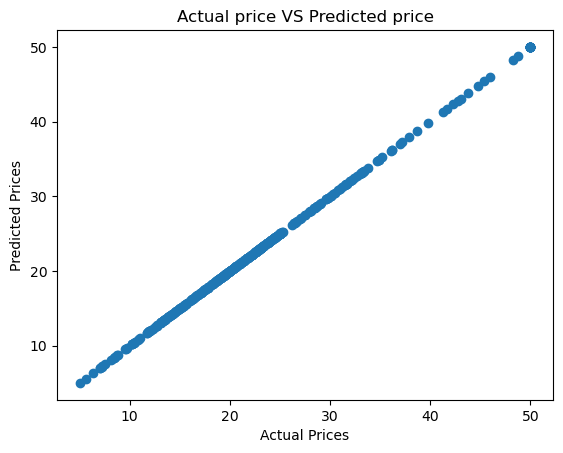

In [24]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual price VS Predicted price')
plt.show()

Prediction on test data.....

In [25]:
test_data_prediction=model.predict(x_test)

In [26]:
score_1=metrics.r2_score(y_test,test_data_prediction)
print("r square error:",score_1)

r square error: 0.9156404620793328


In [27]:
score_2=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean absolute error:",score_2)

Mean absolute error: 1.9900942007700595


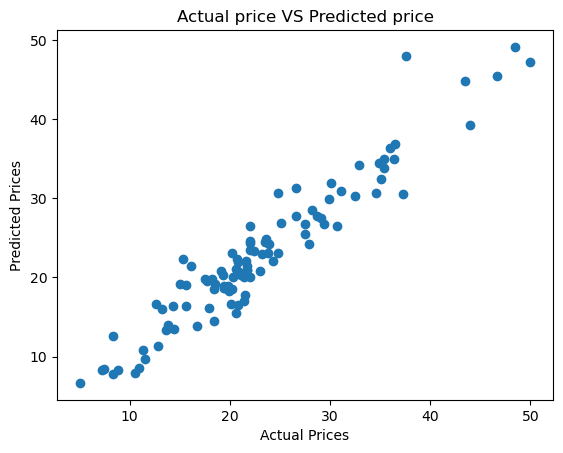

In [28]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual price VS Predicted price')
plt.show()